In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
mu1 ,sigma1 = 0 , 0.3
mu2 ,sigma2 = 2 , 0.3
np.random.seed(30) 

xp1 = np.random.normal(mu1 , sigma1 , 100)
xp2 = np.random.normal(mu1 , sigma1 , 100)

xn1 =np.random.normal(mu2 , sigma2 , 100)
xn2 =np.random.normal(mu2 , sigma2 , 100)

#plt.hist(xp2, 30, density=True)
#plt.show()

In [ ]:
XP = pd.DataFrame([],columns=['x1','x2'])
XP['x1']=xp1
XP['x2']=xp2
XP['label']=np.ones((len(xp1),1) , dtype=int)

XN = pd.DataFrame([],columns=['x1','x2'])
XN['x1']=xn1
XN['x2']=xn2
XN['label']=(-1)*(np.ones((len(xn1),1) , dtype=int))

X=XP.append(XN, ignore_index=True)
x_train=X[['x1','x2']]
x_train=x_train.to_numpy()
y_train=X[['label']]
y_train=y_train.to_numpy()



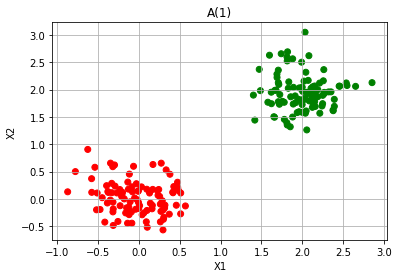

In [ ]:
plt.scatter(X['x1'],X['x2'] , c=X['label'].map({1:'red',-1:'green'}))
plt.grid()
plt.title('A(1)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
class Adaline:
  def __init__(self, b, w, alpha,threshold,epoch=5000):
    self.epoch=epoch
    self.alpha=alpha
    self.w=w
    self.b =b
    self.threshold=threshold
  def net (self,xin):
    #NET = np.dot(xin,self.w)+self.b
    NET= xin.dot(self.w)+self.b
    return NET
  def h (self,xin):
    if self.net(xin)>=0:
      H=1
    else:
      H=0
    return H
  def update(self , xin , t_out):
    self.w = self.w + self.alpha*(t_out - self.net(xin))*xin
    self.b = self.b + self.alpha*(t_out - self.net(xin))
  def error (self,xin,t_out):
    return 0.5 *((t_out.T - self.net(xin))**2)
  def ok (self,xin,t_out):
    if self.error(xin , t_out) >= self.threshold :
      OK=0
    else:
      OK=1
    return OK
  def train(self , xin , t_out):    
    error =[]
    for i in range(1,self.epoch +1):
      e=0
      for s in range(0,len(xin)) :
        self.update(xin[s],t_out[s])
        ee=self.ok(xin[s],t_out[s])        
        e=e+ee
      error +=[self.error(xin,t_out).max()]

      if self.error(xin,t_out).max() <= self.threshold:#e==len(xin):
        break
   #@ print("__________")    
    #print(self.epoch)
    return error



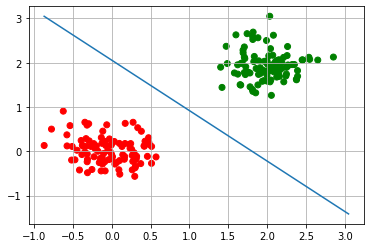

0.1496449953935933


In [ ]:
tolerance = 0.1
weights = np.random.rand(2)
b = np.random.rand(1)
alpha = 0.01
mod1 = Adaline(b,weights,alpha,tolerance,2000)
j=mod1.train(x_train,y_train)
x = np.linspace(min(x_train[:, 0]), max(x_train[:, 1]), 100)
y = -1*mod1.w[0]/mod1.w[1] * x - mod1.b/mod1.w[1]
plt.scatter(X['x1'],X['x2'] , c=X['label'].map({1:'red',-1:'green'}))
plt.grid()
plt.plot(x, y)
plt.show()
print(j[-1])

<function matplotlib.pyplot.show>

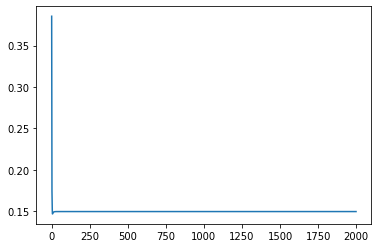

In [ ]:
plt.plot(range(0,len(j)),j)
plt.show
#for i in j:
 # if i>200:
  #  print(i)

In [ ]:
mu1n ,sigma1n =[2 ,1] , [1, 0.1]
mu2n ,sigma2n = [-1 ,2] , 0.4
np.random.seed(4) 

xp1n = np.random.normal(mu1n[0] , sigma1n[0] , 100)
xp2n = np.random.normal(mu1n[1] , sigma1n[1] , 100)

xn1n =np.random.normal(mu2n[0] , sigma2n , 20)
xn2n =np.random.normal(mu2n[1] , sigma2n , 20)

In [ ]:
XPn = pd.DataFrame([],columns=['x1','x2'])
XPn['x1']=xp1n
XPn['x2']=xp2n
XPn['label']=np.ones((len(xp1n),1) , dtype=int)

XNn = pd.DataFrame([],columns=['x1','x2'])
XNn['x1']=xn1n
XNn['x2']=xn2n
XNn['label']=(-1)*(np.ones((len(xn1n),1) , dtype=int))

Xn=XPn.append(XNn, ignore_index=True)
xn_train=Xn[['x1','x2']]
xn_train=xn_train.to_numpy()
yn_train=Xn[['label']]
yn_train=yn_train.to_numpy()

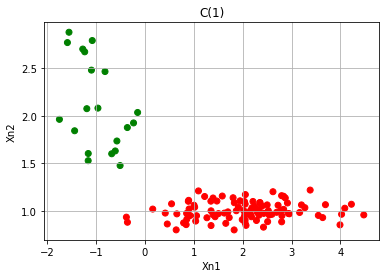

In [ ]:
plt.scatter(Xn['x1'],Xn['x2'] , c=Xn['label'].map({1:'red',-1:'green'}))
plt.grid()
plt.title('C(1)')
plt.xlabel('Xn1')
plt.ylabel('Xn2')
plt.show()

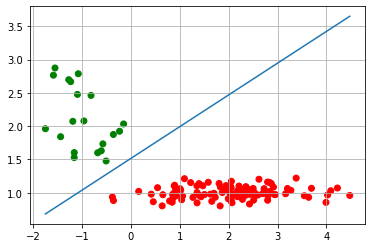

0.1496449953935933


In [ ]:
tolerance = 0.1
weights = np.random.rand(2)
b = np.random.rand(1)
alpha = 0.0001
mod2 = Adaline(b,weights,alpha,tolerance,2000)
jn=mod2.train(xn_train,yn_train)
x_n = np.linspace(min(xn_train[:, 0]), max(xn_train[:, 0]), 100)
y_n = -1*mod2.w[0]/mod2.w[1] * x_n - mod2.b/mod2.w[1]
plt.scatter(Xn['x1'],Xn['x2'] , c=Xn['label'].map({1:'red',-1:'green'}))
plt.grid()
plt.plot(x_n, y_n)
plt.show()
print(j[-1])


<function matplotlib.pyplot.show>

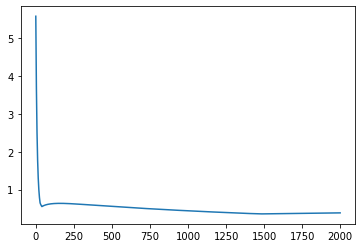

In [ ]:
plt.plot(range(0,len(jn)),jn)
plt.show
#for i in jn:
 # if i>1:
  #  print(i)